# Q1

In [2]:
import pandas as pd


# Load the data file
train = pd.read_csv('ann-train.csv', header=0, na_values='?')
test = pd.read_csv('ann-test.csv', header=0, na_values='?')

# Print the first few rows of the data
print(train.head())
print("~~~")
print(test.head())

   Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0     0.73        0        1        0        0        0        0        0   
1     0.24        0        0        0        0        0        0        0   
2     0.47        0        0        0        0        0        0        0   
3     0.64        1        0        0        0        0        0        0   
4     0.23        0        0        0        0        0        0        0   

   Column9  Column10  ...  Column13  Column14  Column15  Column16  Column17  \
0        1         0  ...         0         0         0         0   0.00060   
1        0         0  ...         0         0         0         0   0.00025   
2        0         0  ...         0         0         0         0   0.00190   
3        0         0  ...         0         0         0         0   0.00090   
4        0         0  ...         0         0         0         0   0.00025   

   Column18  Column19  Column20  Column21  Column22  
0     0.

c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


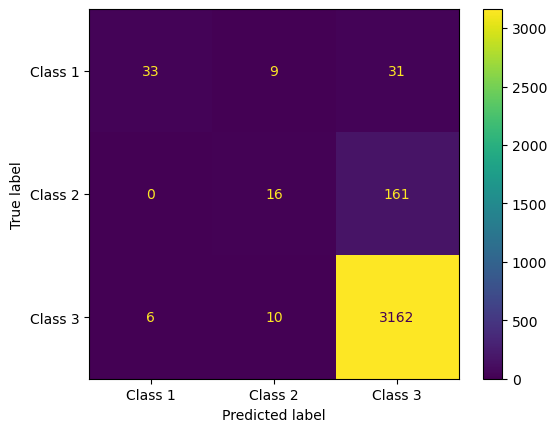

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# the 3 classes we are predicting are in the final column 

# Define the number of nearest neighbors to consider (k)
k = 5

# Create a k-NN classifier with the chosen k value
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn.fit(train.iloc[:, :-1], train.iloc[:, -1])

# Predict the classes of the hold-out validation set
y_pred = knn.predict(test.iloc[:, :-1])

# Compute the confusion matrix
cm = confusion_matrix(test.iloc[:, -1], y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 2', 'Class 3'])
cmd.plot()

# Q2

In [4]:
# Merge classes 1 and 2 into a single class in train set
train.iloc[:, -1].replace({1: 0, 2: 0}, inplace=True)

# Merge classes 1 and 2 into a single class in test set
test.iloc[:, -1].replace({1: 0, 2: 0}, inplace=True)

# Convert class 3 to class 2 in train set
train.iloc[:, -1].replace({3: 1}, inplace=True)

# Convert class 3 to class 2 in test set
test.iloc[:, -1].replace({3: 1}, inplace=True)

# Print the number of samples in each class after conversion in train and test sets
print(train.iloc[:, -1].value_counts())
print(test.iloc[:, -1].value_counts())


1    3488
0     284
Name: Column22, dtype: int64
1    3178
0     250
Name: Column22, dtype: int64


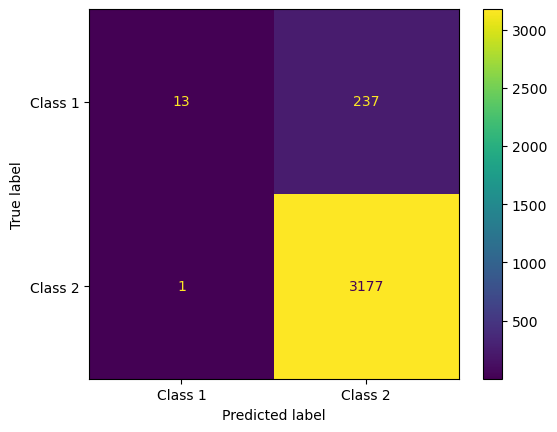

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the features and labels of the training and test sets
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

# Create a logistic regression model and fit it to the training data
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Make predictions on the test data and calculate the confusion matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 2'])
cmd.plot()


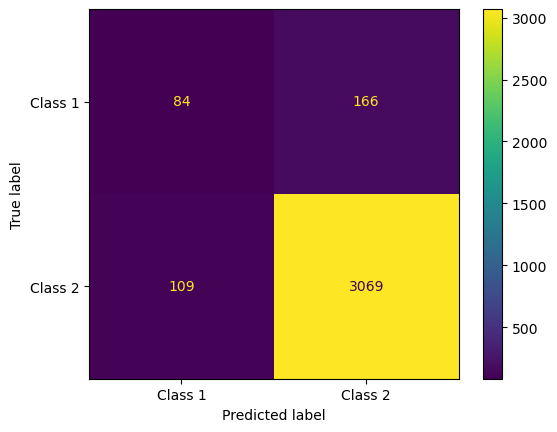

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the features and labels of the training and test sets
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

# Create a logistic regression model and fit it to the training data
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Make predictions on the test data using predicted probabilities
y_proba = lr.predict_proba(X_test)
y_pred = (y_proba[:,0] < 0.15).astype(int)

# Calculate the confusion matrix and display it
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 2'])
cmd.plot()


# Q3

Original linear regression model with no regularisation

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load the data from the csv file
df = pd.read_csv('pokemonregr.csv')
df = df.dropna()

# Split the data into input and output/target variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create the linear regression model and fit it to the data
reg = LinearRegression().fit(X, y)
print(f"Linear Regression coefficients: {reg.coef_}")
print(f"L1 Norm: {np.linalg.norm(reg.coef_, ord=1)}")
print(f"L2 Norm: {np.linalg.norm(reg.coef_, ord=2)}\n")

# Create L1 regularized linear regression model and fit it to the data
lasso = Lasso(alpha=5).fit(X, y)
print(f"L1 Regularized coefficients: {lasso.coef_}")
print(f"L1 Norm: {np.linalg.norm(lasso.coef_, ord=1)}")
print(f"L2 Norm: {np.linalg.norm(lasso.coef_, ord=2)}\n")

# Create L2 regularized linear regression model and fit it to the data
ridge = Ridge(alpha=100).fit(X, y)
print(f"L2 Regularized coefficients: {ridge.coef_}")
print(f"L1 Norm: {np.linalg.norm(ridge.coef_, ord=1)}")
print(f"L2 Norm: {np.linalg.norm(ridge.coef_, ord=2)}")


Linear Regression coefficients: [ 3.77397553e-01  5.67721520e-01  5.35146255e+01  2.45998765e-02
  1.53453033e-01 -4.21539817e-01]
L1 Norm: 55.059337295172114
L2 Norm: 53.5208531999897

L1 Regularized coefficients: [ 0.42163505  0.59735496 47.87667017  0.0507657   0.16940076 -0.40801531]
L1 Norm: 49.523841962662935
L2 Norm: 47.88431795867004

L2 Regularized coefficients: [ 0.43924678  0.60198028 46.62474358  0.0634456   0.17903753 -0.42012183]
L1 Norm: 48.32857560141524
L2 Norm: 46.63297775374945


In [30]:
# Print the coefficients for the linear regression model
print("Linear Regression Coefficients:")
for i, coef in enumerate(reg.coef_):
    print(f"  Coefficient {i+1}: {coef:.2f}")
print(f"  Intercept: {reg.intercept_:.2f}")

# Print the coefficients for the L1 regularization model
print("L1 Regularization Coefficients:")
for i, coef in enumerate(lasso.coef_):
    print(f"  Coefficient {i+1}: {coef:.2f}")
print(f"  Intercept: {lasso.intercept_:.2f}")

# Print the coefficients for the L2 regularization model
print("L2 Regularization Coefficients:")
for i, coef in enumerate(ridge.coef_):
    print(f"  Coefficient {i+1}: {coef:.2f}")
print(f"  Intercept: {ridge.intercept_:.2f}")


Linear Regression Coefficients:
  Coefficient 1: 0.38
  Coefficient 2: 0.57
  Coefficient 3: 53.51
  Coefficient 4: 0.02
  Coefficient 5: 0.15
  Coefficient 6: -0.42
  Intercept: -56.39
L1 Regularization Coefficients:
  Coefficient 1: 0.42
  Coefficient 2: 0.60
  Coefficient 3: 47.88
  Coefficient 4: 0.05
  Coefficient 5: 0.17
  Coefficient 6: -0.41
  Intercept: -59.34
L2 Regularization Coefficients:
  Coefficient 1: 0.44
  Coefficient 2: 0.60
  Coefficient 3: 46.62
  Coefficient 4: 0.06
  Coefficient 5: 0.18
  Coefficient 6: -0.42
  Intercept: -60.38
